In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
metrics_path = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_19"


training_metrics = pd.read_csv(f"{metrics_path}/metrics.csv")


training_metrics.columns

Index(['brier_score', 'epoch', 'lr_find/suggested_lr', 'multilabel_f1_macro',
       'multilabel_f1_micro', 'multilabel_f1_weighted', 'step',
       'train_brier_Atelectasis_epoch', 'train_brier_Atelectasis_step',
       'train_brier_Cardiomegaly_epoch', 'train_brier_Cardiomegaly_step',
       'train_brier_Consolidation_epoch', 'train_brier_Consolidation_step',
       'train_brier_Edema_epoch', 'train_brier_Edema_step',
       'train_brier_Effusion_epoch', 'train_brier_Effusion_step',
       'train_brier_Emphysema_epoch', 'train_brier_Emphysema_step',
       'train_brier_Fibrosis_epoch', 'train_brier_Fibrosis_step',
       'train_brier_Hernia_epoch', 'train_brier_Hernia_step',
       'train_brier_Infiltration_epoch', 'train_brier_Infiltration_step',
       'train_brier_Mass_epoch', 'train_brier_Mass_step',
       'train_brier_No Finding_epoch', 'train_brier_No Finding_step',
       'train_brier_Nodule_epoch', 'train_brier_Nodule_step',
       'train_brier_Pleural_Thickening_epoch',
   

In [3]:
training_metrics

,brier_score,epoch,lr_find/suggested_lr,multilabel_f1_macro,multilabel_f1_micro,multilabel_f1_weighted,step,train_brier_Atelectasis_epoch,train_brier_Atelectasis_step,train_brier_Cardiomegaly_epoch,...,val_brier_Mass,val_brier_No Finding,val_brier_Nodule,val_brier_Pleural_Thickening,val_brier_Pneumonia,val_brier_Pneumothorax,val_loss,val_multilabel_f1_macro,val_multilabel_f1_micro,val_multilabel_f1_weighted
0,NaN,NaN,0.000001,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,NaN,NaN,49,NaN,0.322720,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,99,NaN,0.302875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.0,NaN,NaN,NaN,NaN,149,NaN,0.291171,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,NaN,NaN,NaN,NaN,199,NaN,0.283258,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,NaN,49.0,NaN,NaN,NaN,NaN,26949,NaN,0.209614,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,49.0,NaN,NaN,NaN,NaN,26999,NaN,0.209596,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,49.0,NaN,NaN,NaN,NaN,27049,NaN,0.209579,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,0.191086,49.0,NaN,NaN,NaN,NaN,27049,NaN,NaN,NaN,...,0.208251,0.215283,0.229754,0.20692,0.209237,0.186649,1.096289,0.185317,0.26842,0.465356


In [4]:
columns_to_keep = ['train_loss', 'val_loss', 'epoch']

# Drop all columns except the ones you want to keep
train_val_metrics = training_metrics.drop(columns=training_metrics.columns.difference(columns_to_keep), axis=1)

train_val_metrics_grouped = train_val_metrics.groupby("epoch").mean()

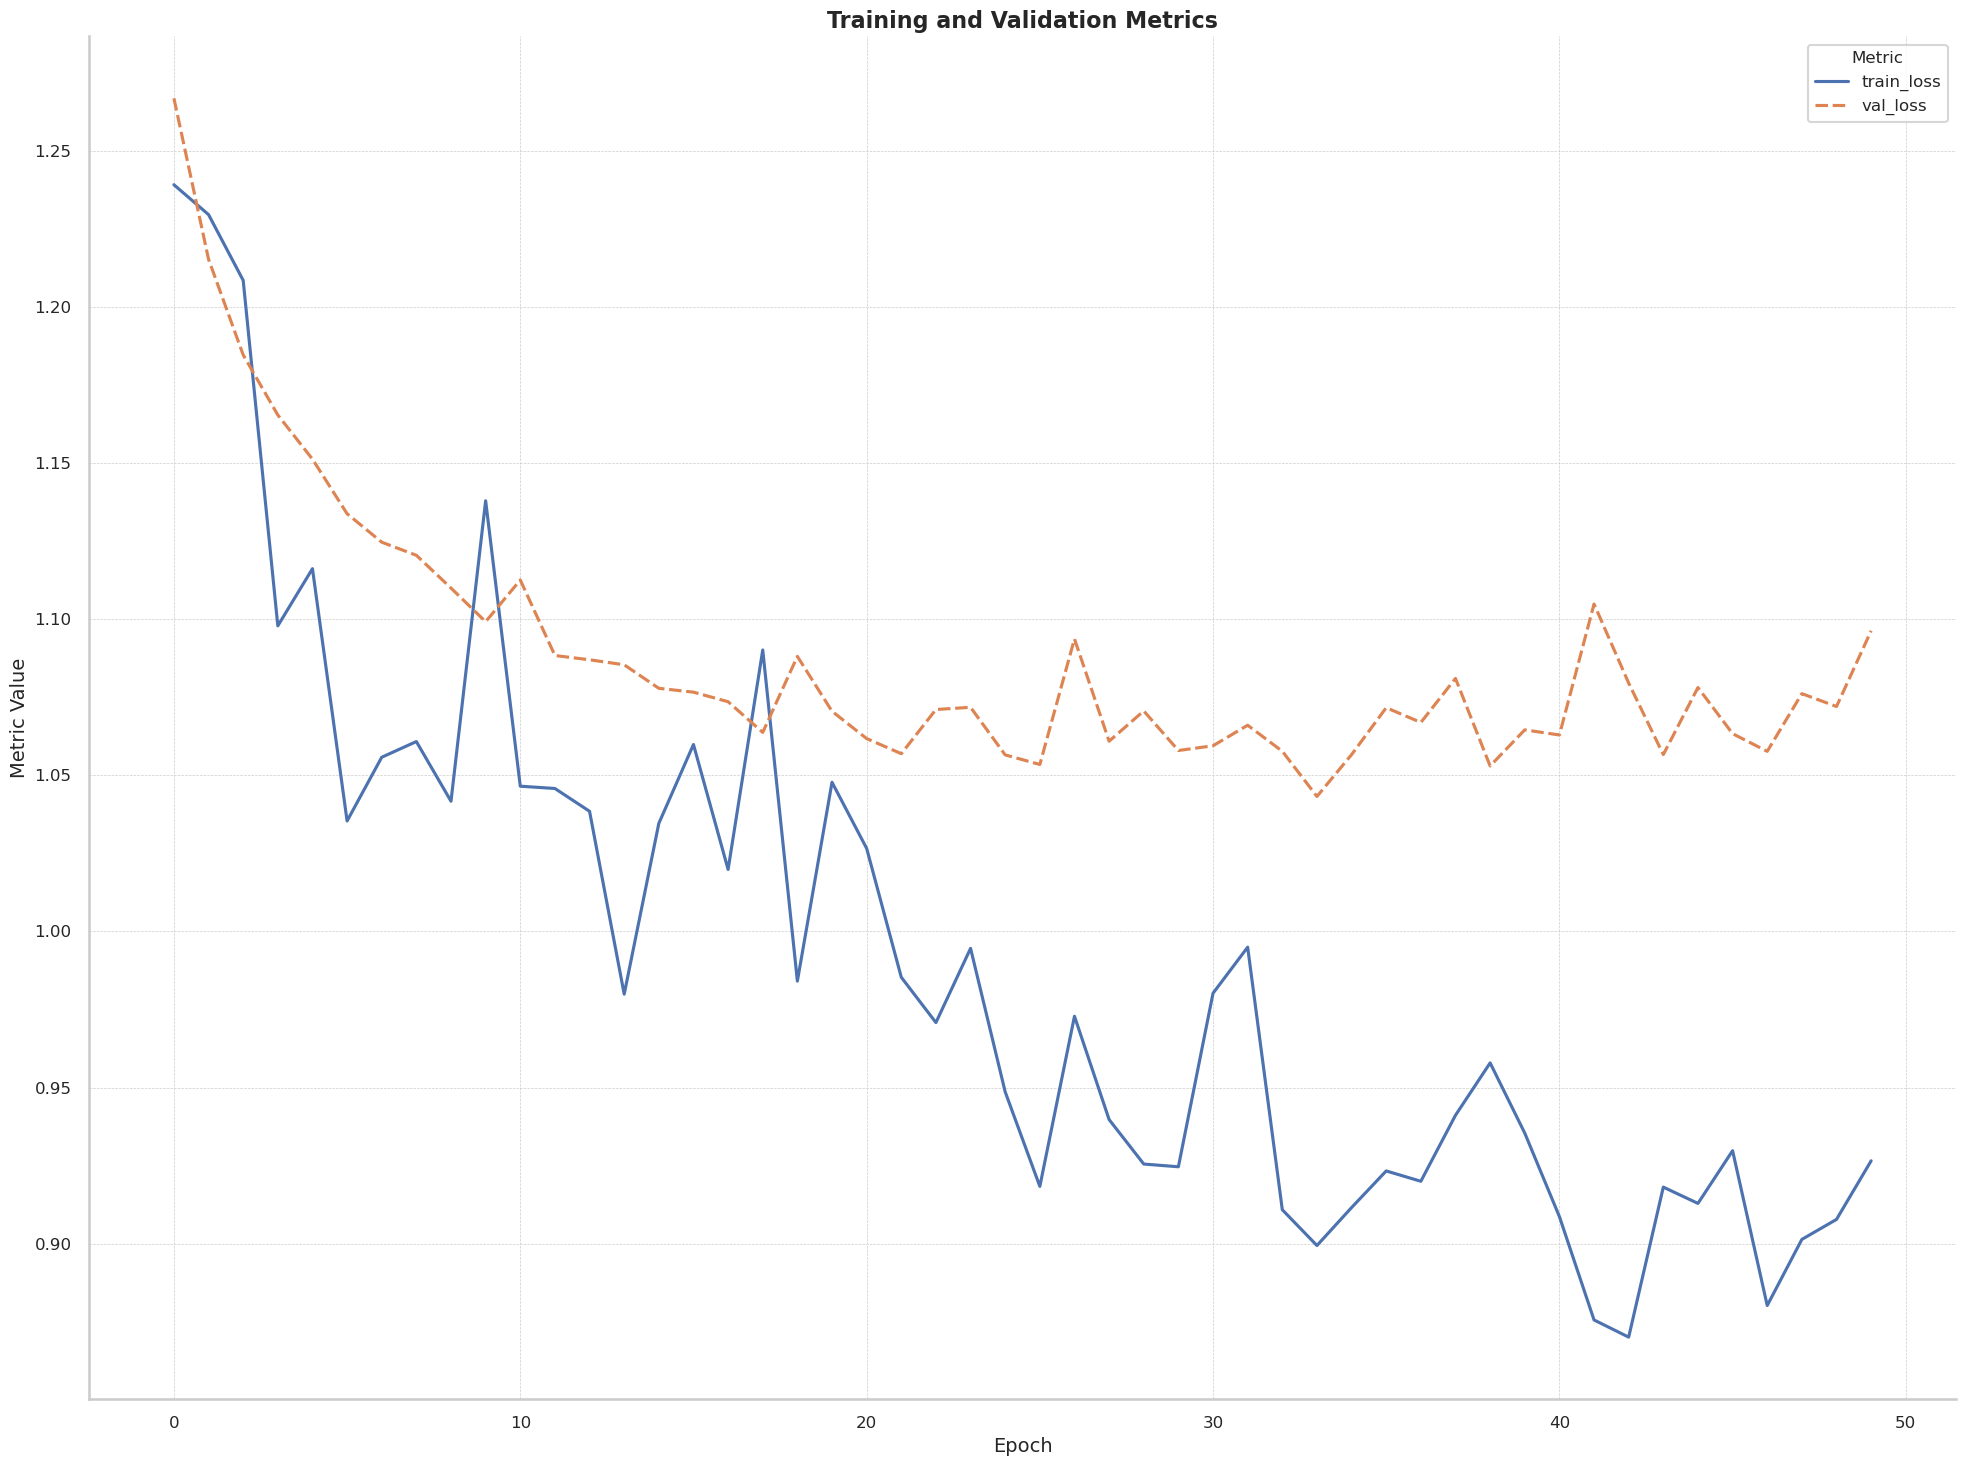

In [5]:
sns.set(style="whitegrid", context="talk")  # "talk" or "paper" for academic feel

plt.figure(figsize=(20, 15))  # More standard academic size

# Plot the data
sns.lineplot(data=train_val_metrics_grouped)

# Title and labels
plt.title("Training and Validation Metrics", fontsize=16, weight='bold')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)

# Remove top and right spines
sns.despine()

# Ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Optional: Legend
plt.legend(title="Metric", title_fontsize=12, fontsize=12, loc='best')

plt.tight_layout()
plt.savefig("training_and_validation_metrics.png")
plt.show()


In [6]:
auc = pd.read_csv("/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_19/auc_per_label.csv")

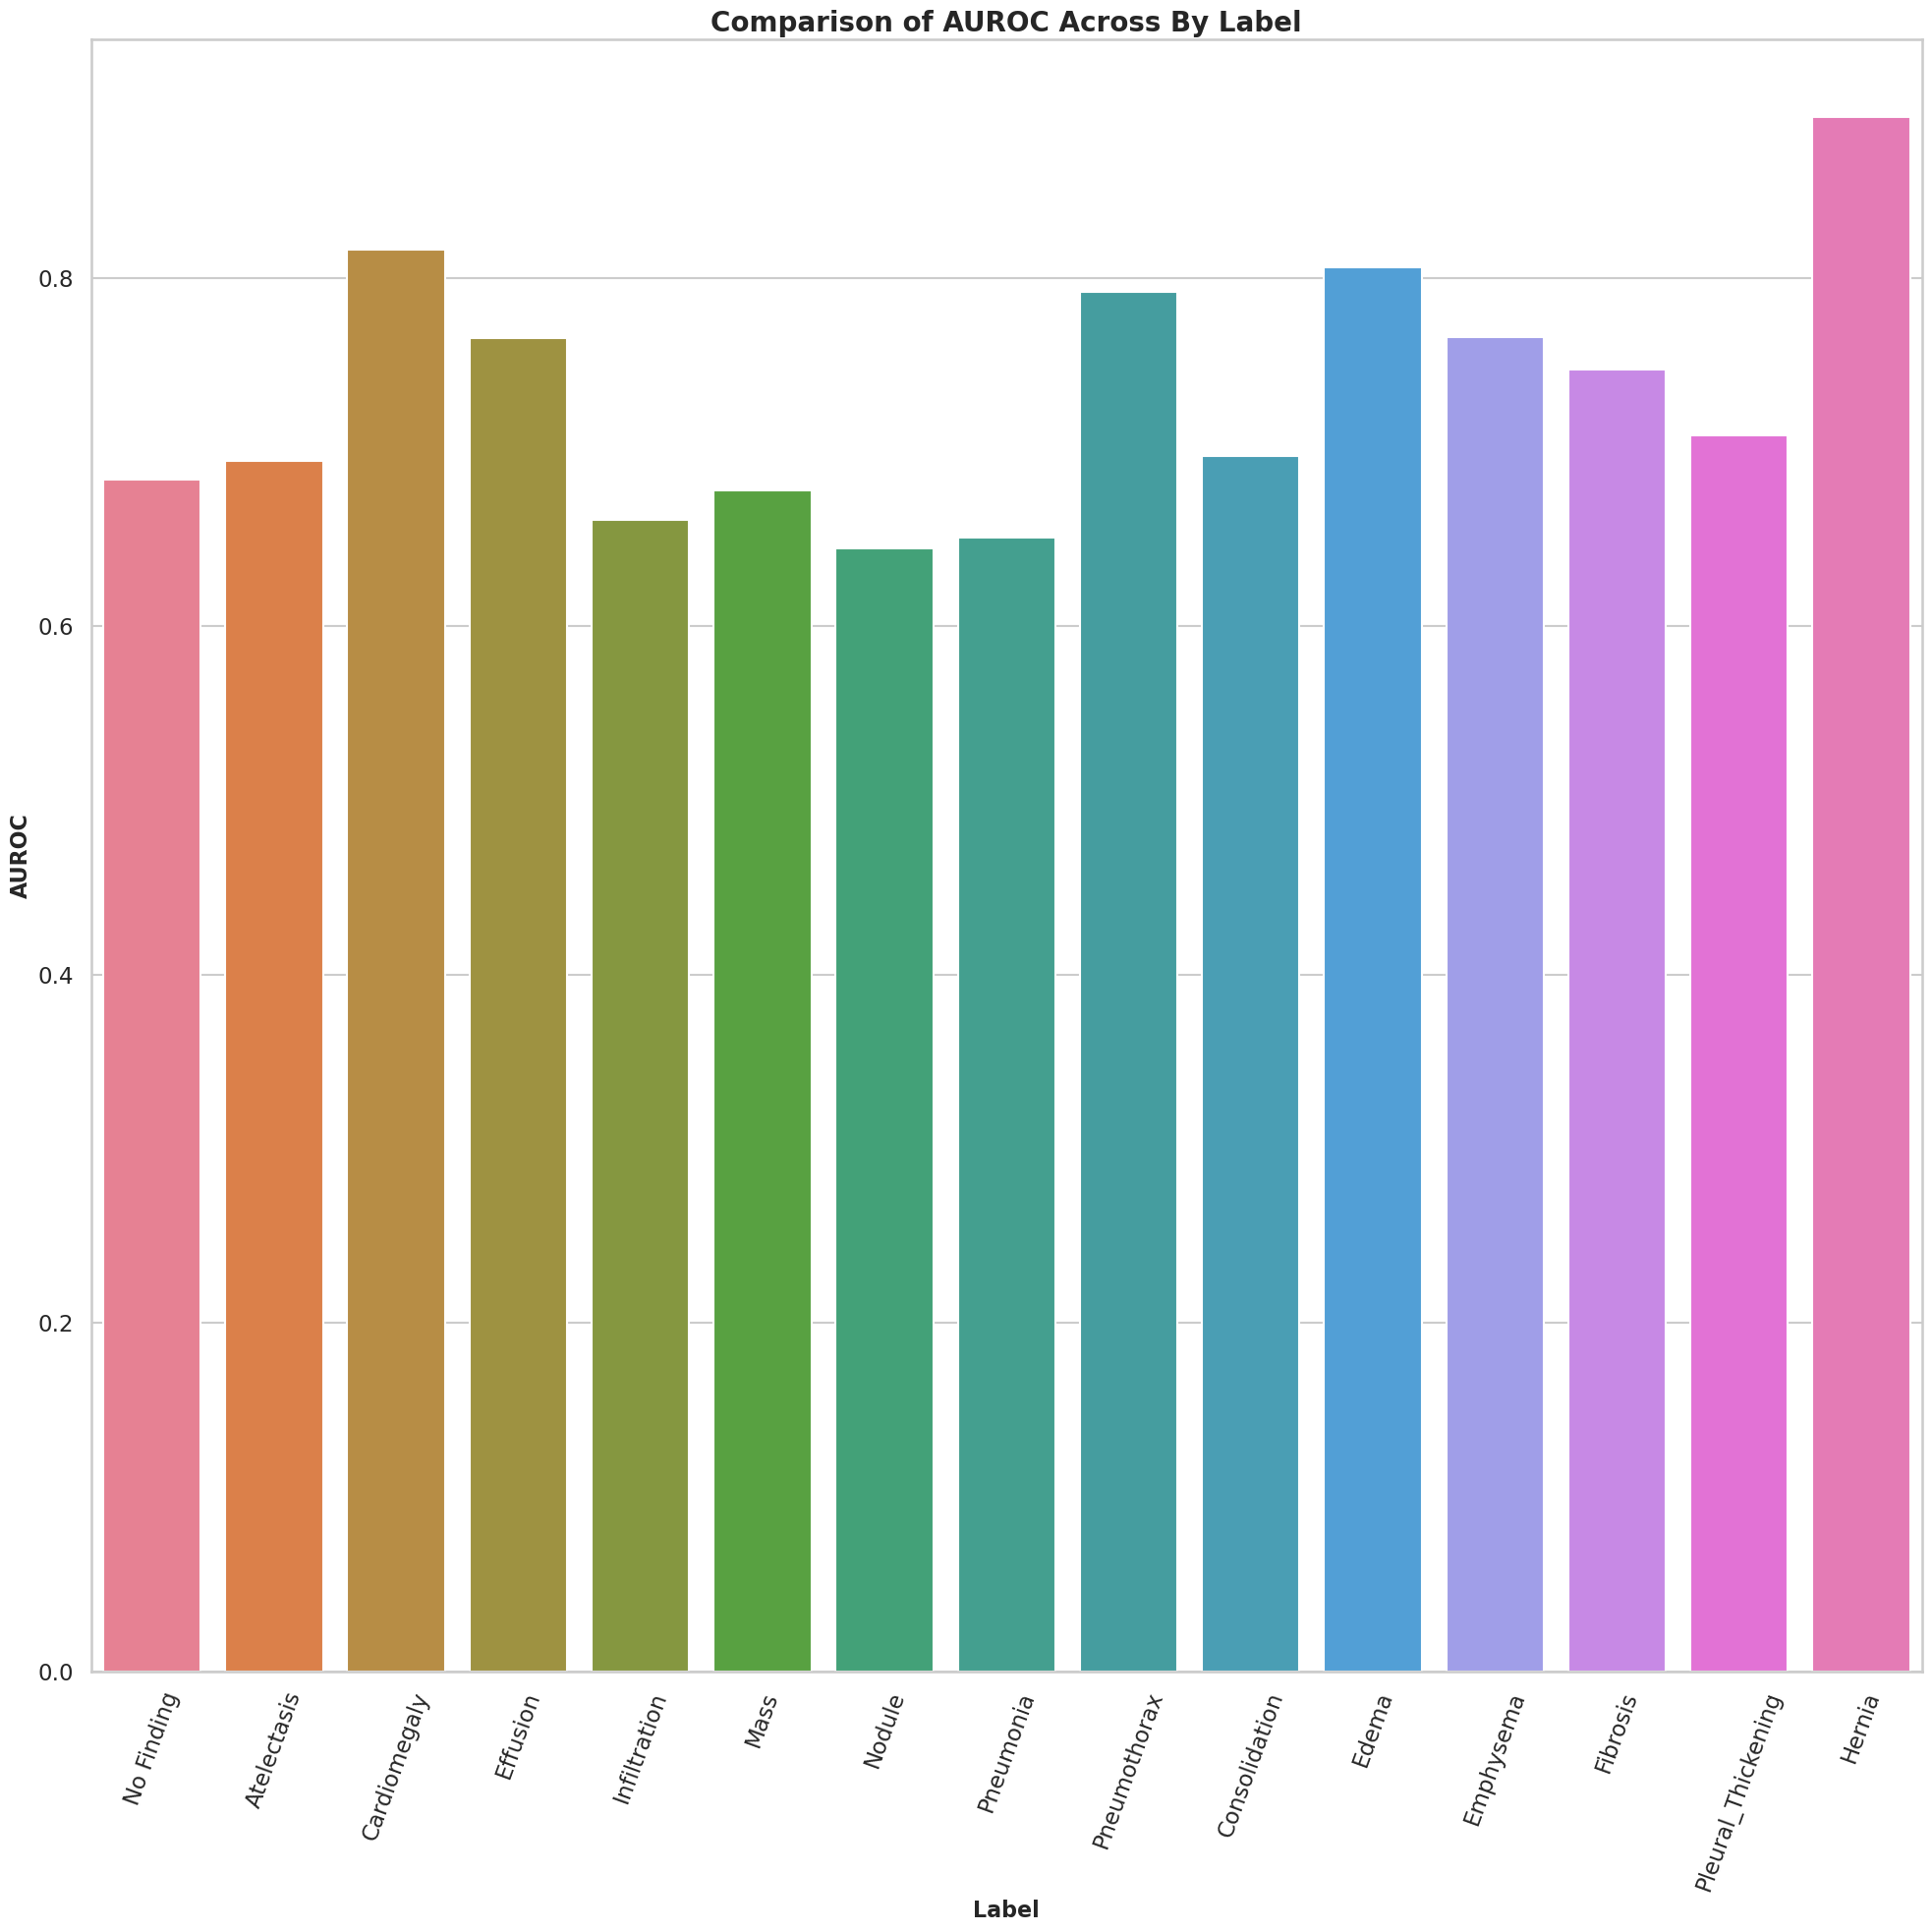

In [7]:
plt.figure(figsize = (20, 20))
sns.barplot(x='label', y='auc_roc', data=auc, hue='label', legend = False)
plt.xlabel("Label", fontsize=16, weight = "bold")
plt.ylabel("AUROC", fontsize=16, weight = "bold")
plt.title("Comparison of AUROC Across By Label", fontsize=20, weight = "bold")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("aucroc_by_label.png")


In [2]:
version_19_path = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_19"

all_pred_probs = pd.read_csv(f"{version_19_path}/all_pred_probs.csv")



all_true_labels = pd.read_csv(f"{version_19_path}/all_true_labels.csv", index_col = 0)

calibrated_probs = pd.read_csv(f"{version_19_path}/all_pred_probs_calibrated.csv")

In [8]:
all_true_labels.columns = all_pred_probs.columns
all_true_labels

,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25592,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25594,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
for idx, label in enumerate(column_names): 
    print(idx, label)

0 No Finding
1 Atelectasis
2 Cardiomegaly
3 Effusion
4 Infiltration
5 Mass
6 Nodule
7 Pneumonia
8 Pneumothorax
9 Consolidation
10 Edema
11 Emphysema
12 Fibrosis
13 Pleural_Thickening
14 Hernia


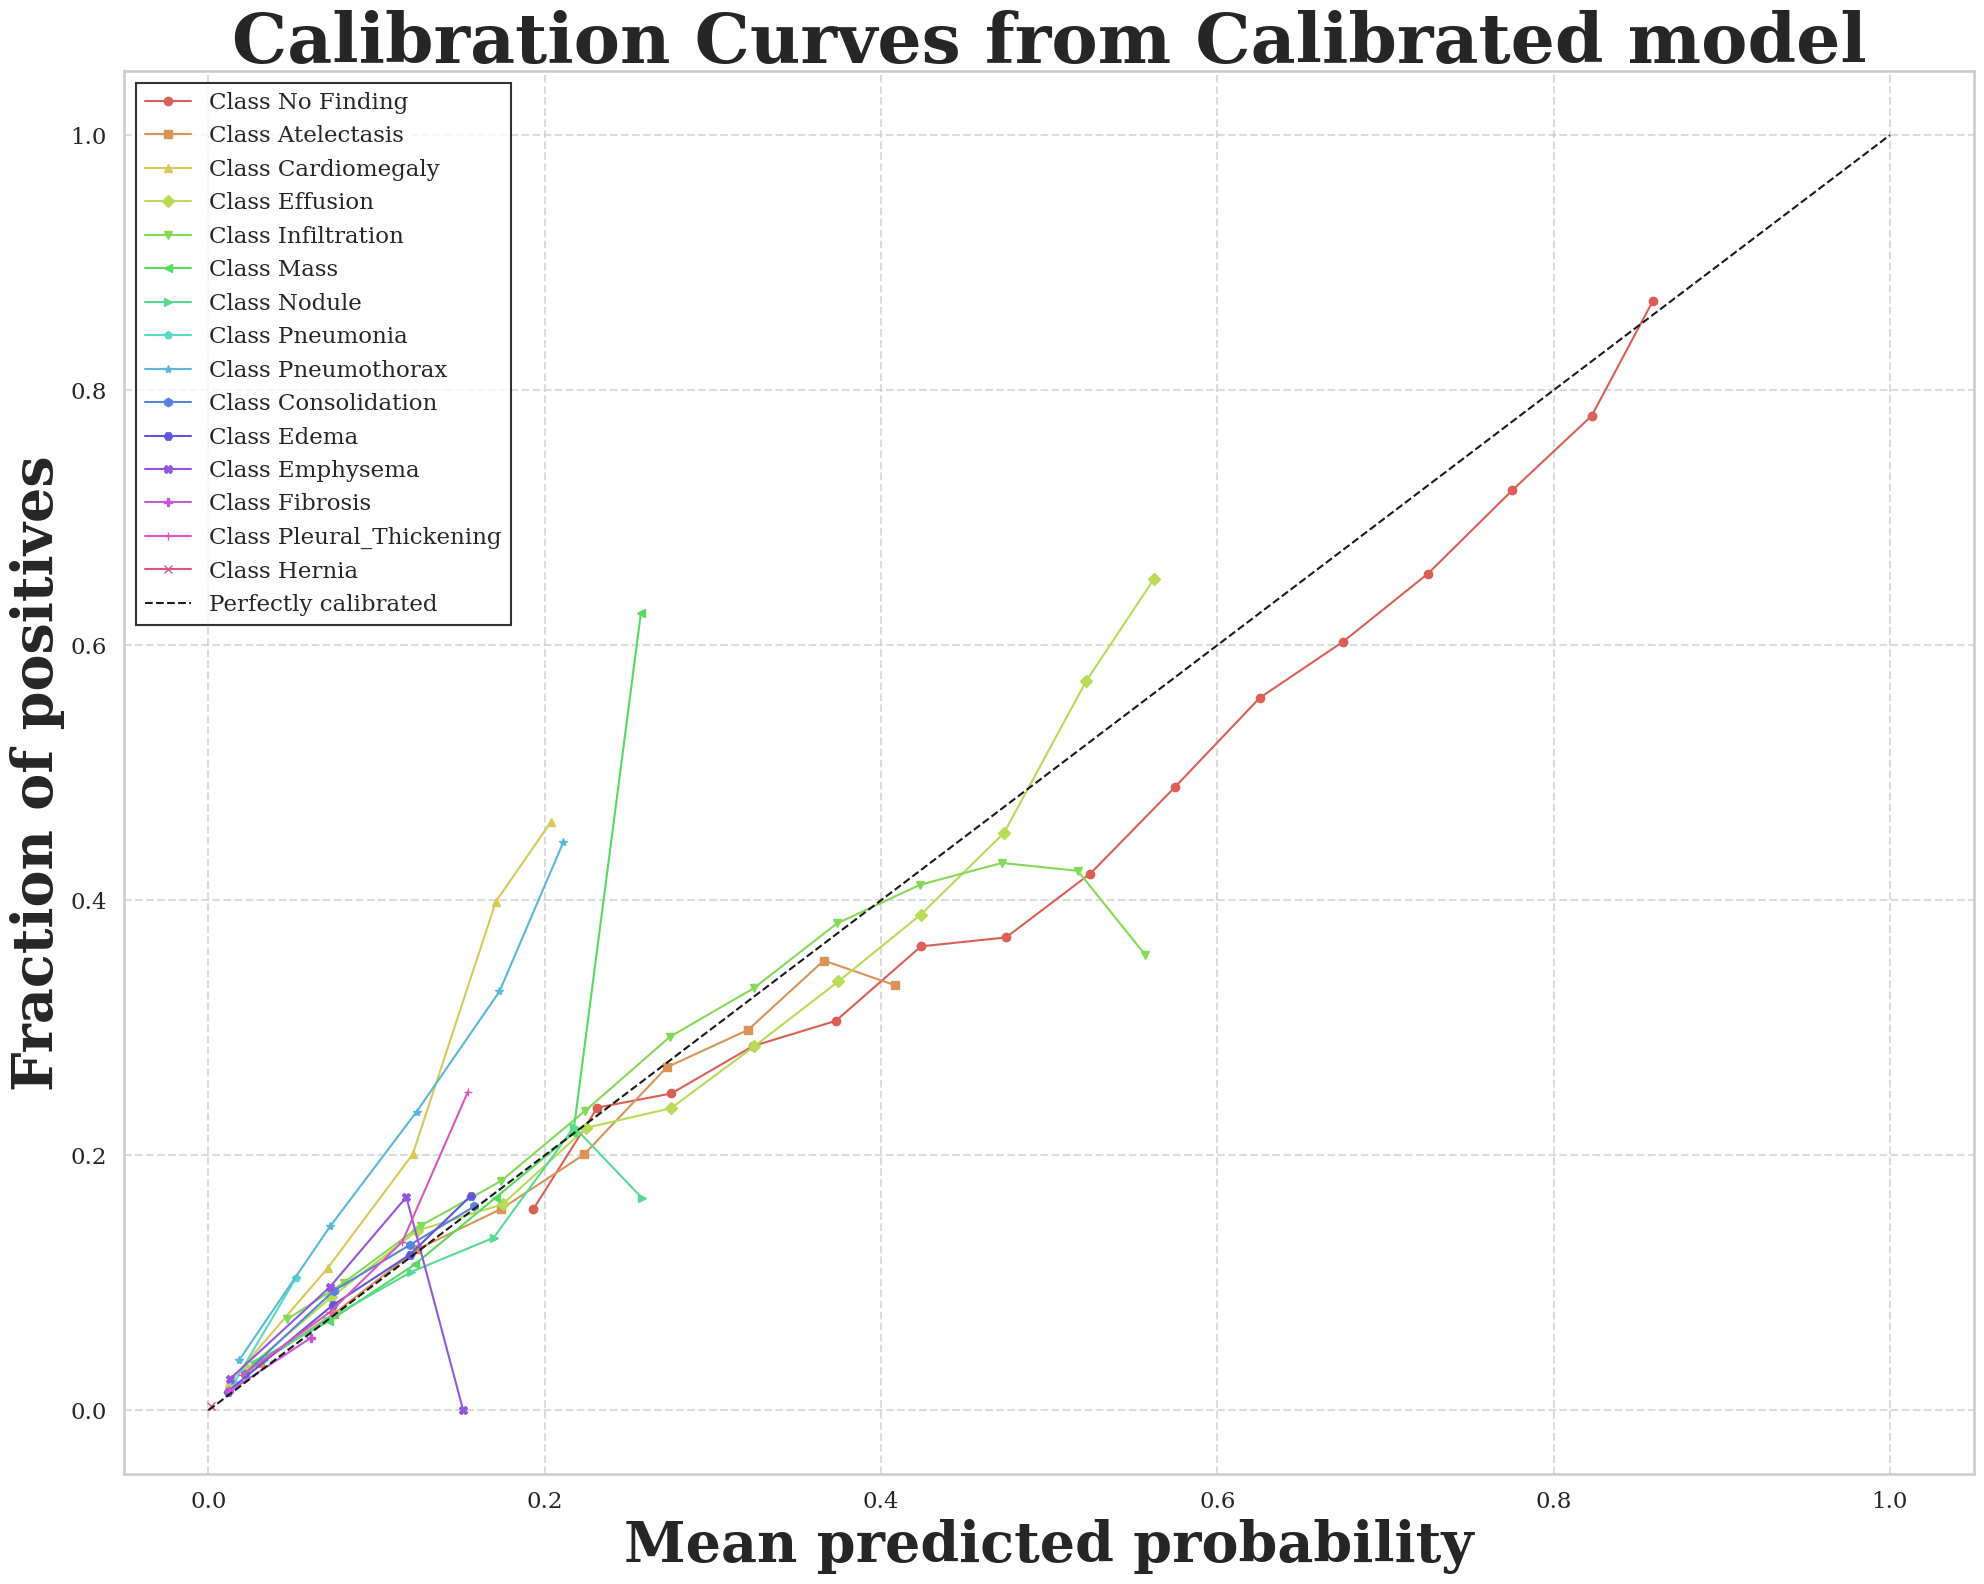

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from matplotlib import rcParams

column_names = calibrated_probs.columns
colors = sns.color_palette("hls", 15)
# Calibrated data ----------------------
# Set academic styling
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

plt.figure(figsize=(20, 16))
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'P', '+', 'x']


for idx, label in enumerate(column_names):
    y_true = np.array(all_true_labels[str(label)])
    y_pred = np.array(calibrated_probs[str(label)])
    
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=20, pos_label=1)
    plt.plot(prob_pred, prob_true, '-', color=colors[idx], marker=markers[idx], 
             markersize=6, lw=1.5, label=f'Class {label}')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Perfectly calibrated')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Mean predicted probability', fontweight='bold', fontsize = 40)
plt.ylabel('Fraction of positives', fontweight='bold', fontsize = 40)
plt.title('Calibration Curves from Calibrated model', fontweight='bold', fontsize= 50)
plt.legend(frameon=True, fancybox=False, edgecolor='black')
plt.tight_layout()
plt.savefig("calibration_curves_calibrated.png")
plt.show()

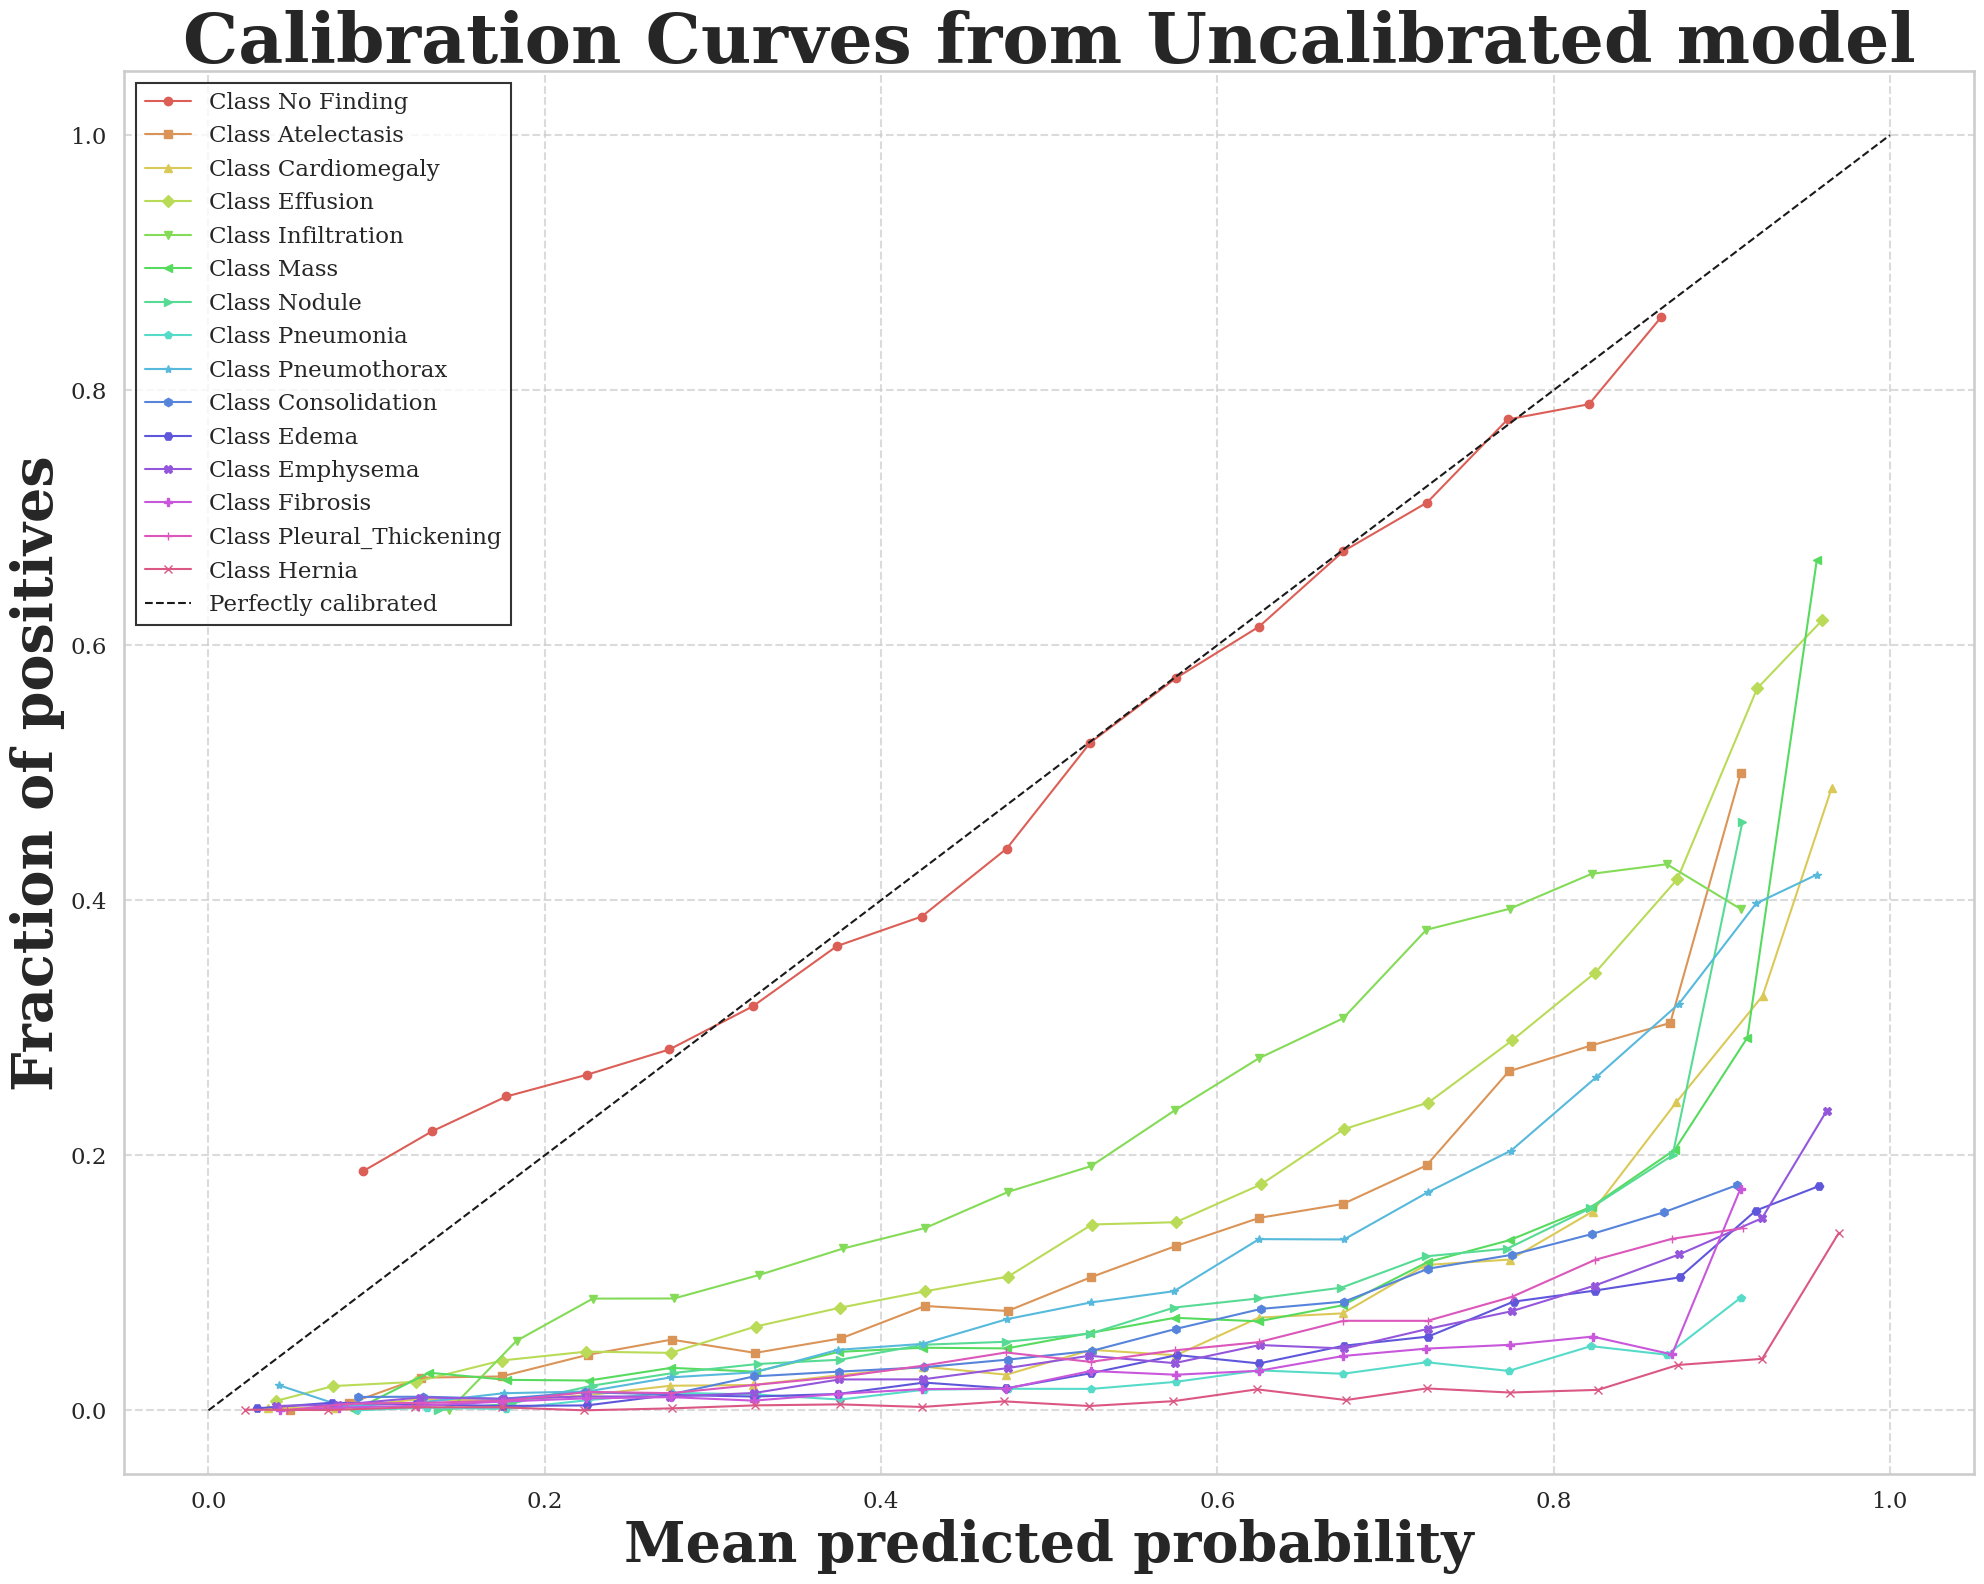

In [36]:
# Calibrated data ----------------------
# Set academic styling
column_names = calibrated_probs.columns
# Calibrated data ----------------------
# Set academic styling
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

plt.figure(figsize=(20, 16))
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'P', '+', 'x']


for idx, label in enumerate(column_names):
    y_true = np.array(all_true_labels[str(label)])
    y_pred = np.array(all_pred_probs[str(label)])
    
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=20, pos_label=1)
    plt.plot(prob_pred, prob_true, '-', color=colors[idx], marker=markers[idx], 
             markersize=6, lw=1.5, label=f'Class {label}')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Perfectly calibrated')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Mean predicted probability', fontweight='bold', fontsize = 40)
plt.ylabel('Fraction of positives', fontweight='bold', fontsize = 40)
plt.title('Calibration Curves from Uncalibrated model', fontweight='bold', fontsize= 50)
plt.legend(frameon=True, fancybox=False, edgecolor='black')
plt.tight_layout()
plt.savefig("calibration_curves_uncalibrated.png")
plt.show()

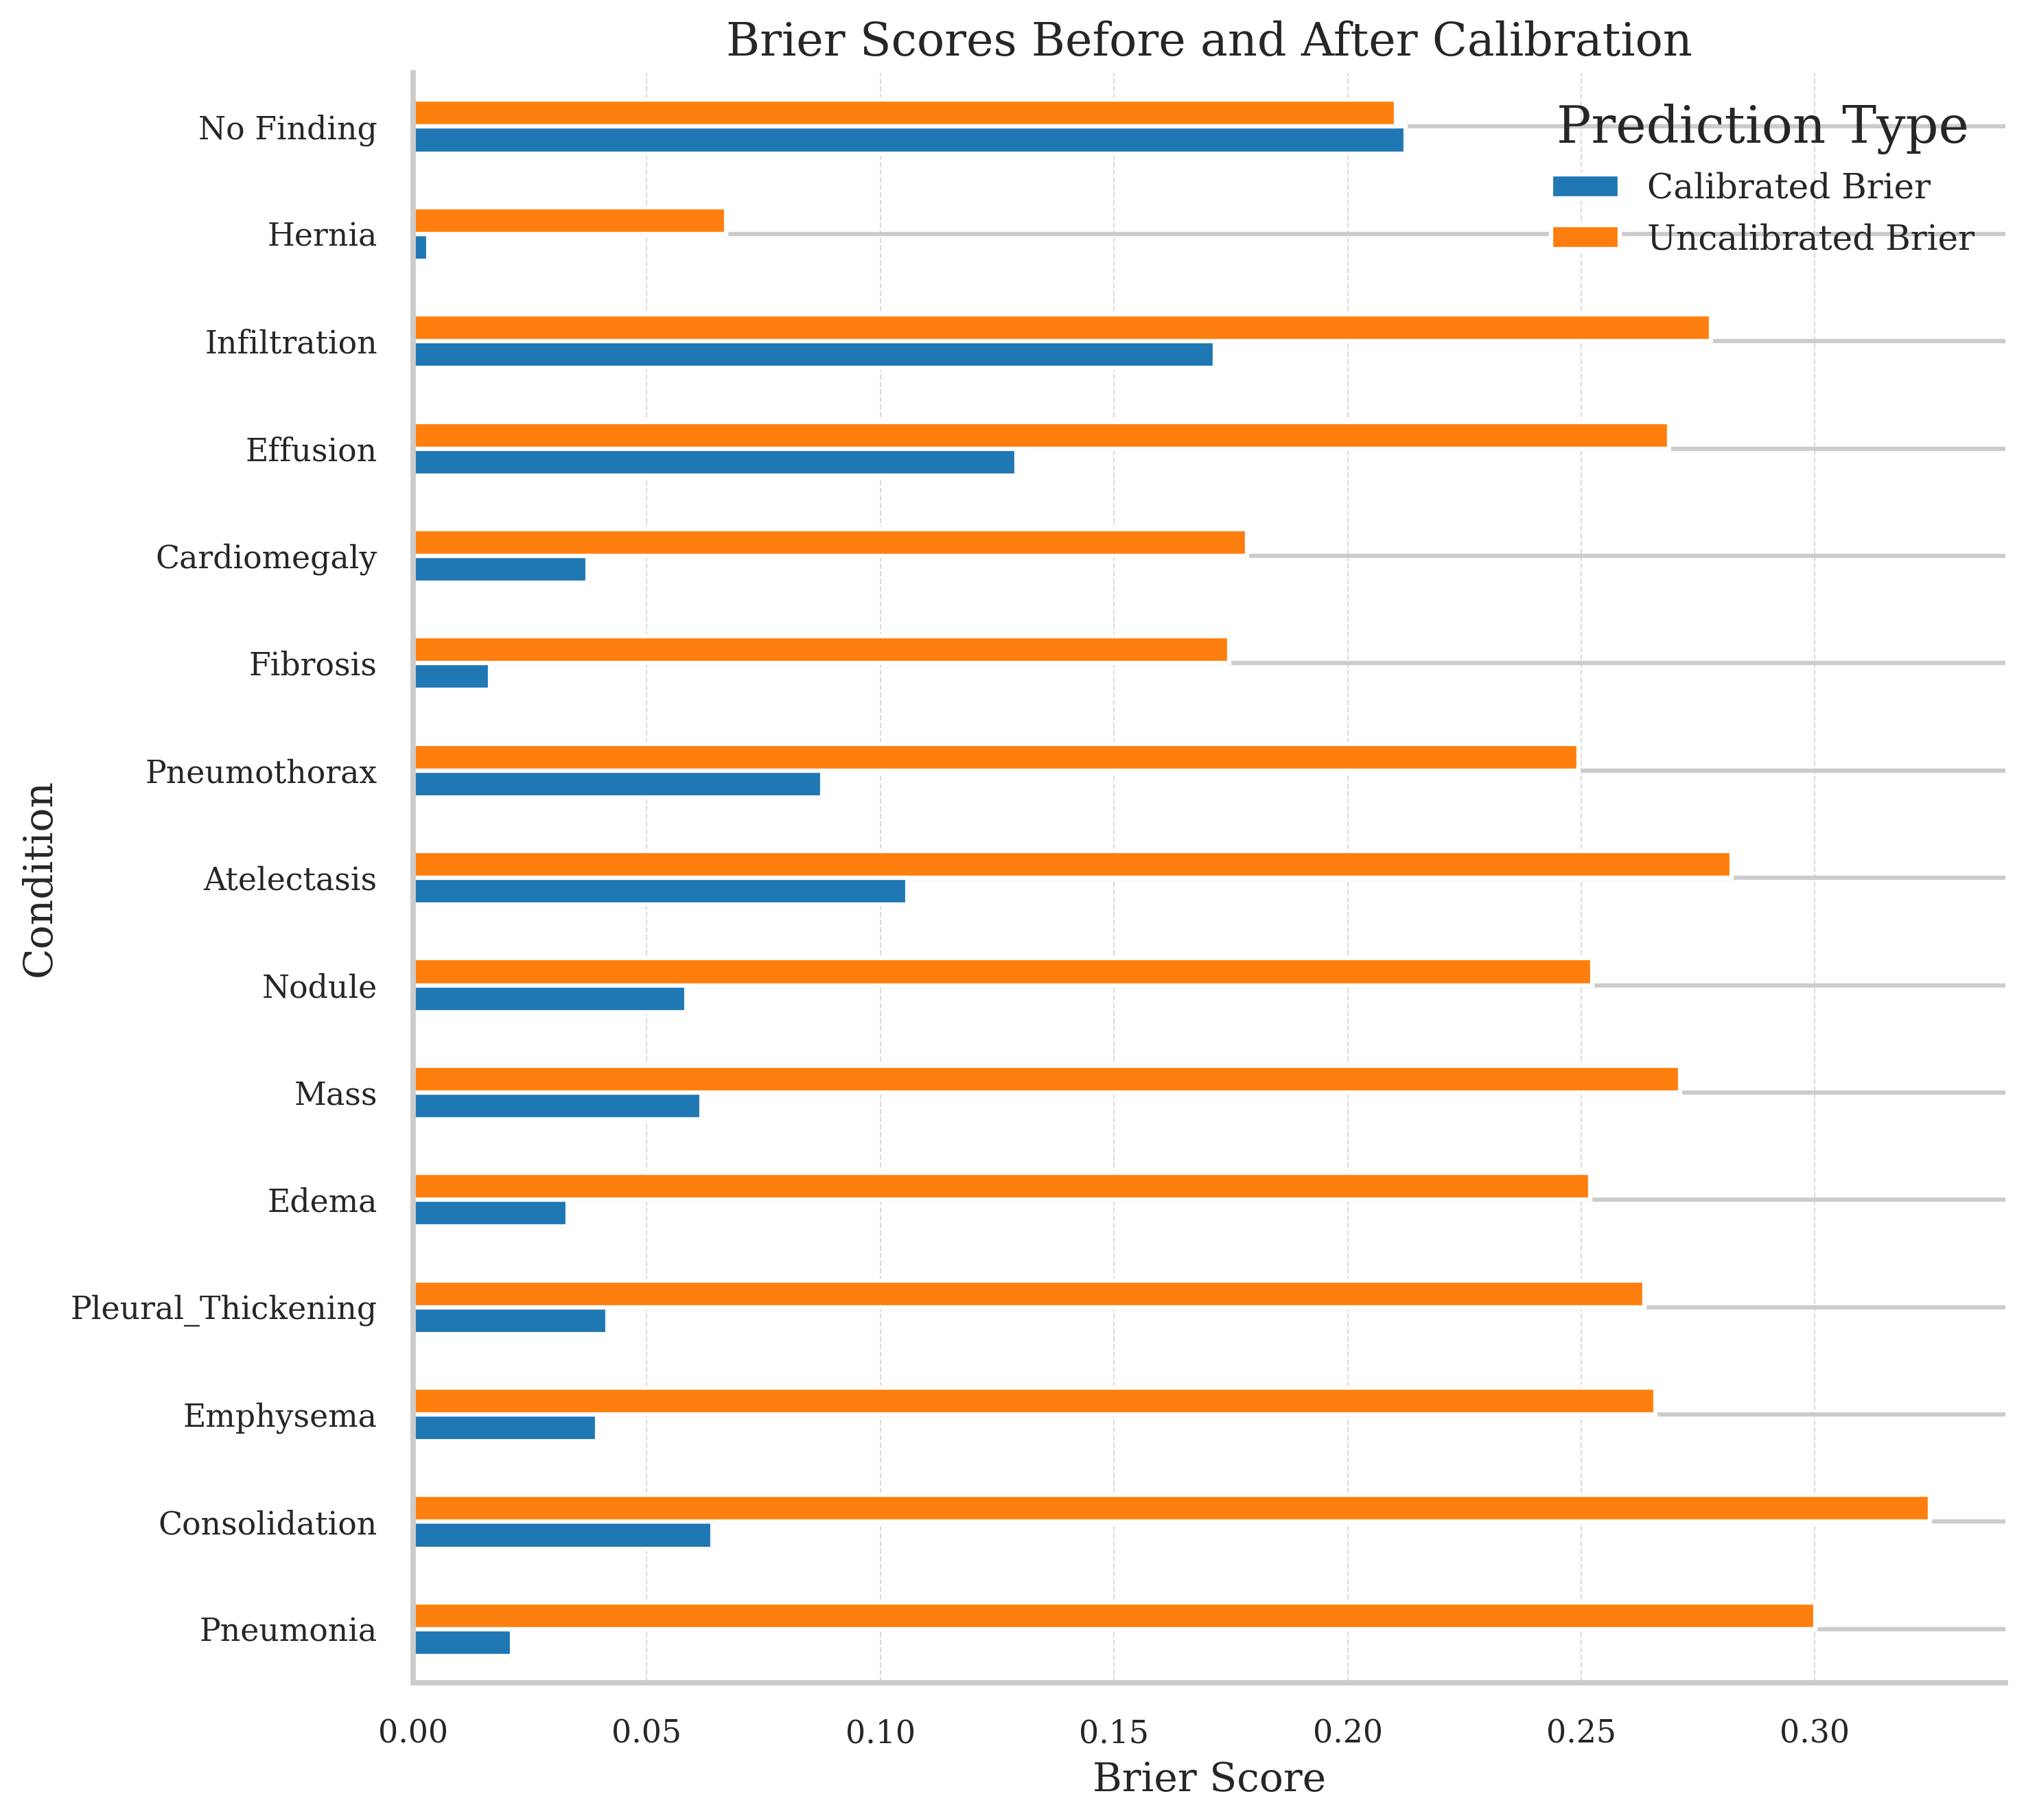

In [20]:
from sklearn.metrics import brier_score_loss
uncalibrated_briers_per_label = {}
calibrated_briers_per_label = {}

for label in all_true_labels.columns:
    y_true = all_true_labels[label]
    y_prob_uncal = all_pred_probs[label]
    
    uncal_score = brier_score_loss(y_true, y_prob_uncal)
    uncalibrated_briers_per_label[label] = uncal_score
    
    y_prob_cal = calibrated_probs[label]
    cal_score = brier_score_loss(y_true, y_prob_cal)
    calibrated_briers_per_label[label] = cal_score
    

    
    
brier_df = pd.DataFrame({"Uncalibrated Brier":uncalibrated_briers_per_label, 
                         "Calibrated Brier": calibrated_briers_per_label})

brier_df['Improvement'] = brier_df['Uncalibrated Brier'] - brier_df['Calibrated Brier']
brier_df_sorted = brier_df.sort_values('Improvement', ascending=False)

import matplotlib.pyplot as plt

# Set publication-style parameters
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'figure.dpi': 300
})

# Wider layout to better fit labels horizontally
fig, ax = plt.subplots(figsize=(10, 9))

# Horizontal bar plot
brier_df_sorted[['Calibrated Brier','Uncalibrated Brier']].plot(
    kind='barh',
    ax=ax,
    color=['#1f77b4', '#ff7f0e']  # Color-blind-friendly palette
)

# Labels and title
ax.set_xlabel('Brier Score')
ax.set_ylabel('Condition')
ax.set_title('Brier Scores Before and After Calibration')

# Clean up plot appearance
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust legend
ax.legend(title='Prediction Type', loc = 'upper right', frameon=False)

# Final layout adjustments
plt.tight_layout()
plt.savefig("brier_scores_horizontal.png", dpi=600, bbox_inches='tight')
plt.show()
    




In [19]:
brier_df_sorted

,Uncalibrated Brier,Calibrated Brier,Improvement
Pneumonia,0.300130,0.021133,0.278997
Consolidation,0.324539,0.063991,0.260548
Emphysema,0.265900,0.039352,0.226548
Pleural_Thickening,0.263525,0.041629,0.221896
Edema,0.251885,0.033123,0.218761
Mass,0.271178,0.061713,0.209465
Nodule,0.252319,0.058436,0.193883
Atelectasis,0.282169,0.105751,0.176418
Pneumothorax,0.249347,0.087563,0.161783
Fibrosis,0.174613,0.016470,0.158143


In [12]:
# calculating brier score for each label before and after calibration - i.e. care about probability accuracy 
sns.style.available

AttributeError: module 'seaborn' has no attribute 'style'

In [10]:
# now get probabilities next to image 
all_pred_probs.head(20)


,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,0.512888,0.324404,0.303798,0.304858,0.384265,0.719008,0.532472,0.391001,0.238488,0.300885,0.068679,0.427023,0.552881,0.501741,0.985429
1,0.538206,0.489725,0.096592,0.457593,0.285584,0.548573,0.568261,0.385285,0.696638,0.293115,0.051287,0.784709,0.723133,0.541619,0.502599
2,0.422763,0.636740,0.296234,0.553136,0.330904,0.460292,0.422567,0.324939,0.462449,0.341941,0.055389,0.772515,0.700274,0.491541,0.960898
3,0.487166,0.350730,0.124686,0.190019,0.397887,0.494770,0.568153,0.275102,0.166862,0.185677,0.028870,0.613930,0.651065,0.640586,0.921969
4,0.427769,0.591289,0.212946,0.392252,0.264992,0.482220,0.396639,0.333854,0.407508,0.298637,0.065500,0.653510,0.721829,0.544543,0.879317
5,0.456445,0.353285,0.453720,0.349259,0.387057,0.607565,0.537927,0.410754,0.180352,0.227060,0.075161,0.492596,0.646654,0.556009,0.986374
6,0.434435,0.428548,0.546316,0.262858,0.439342,0.401924,0.496197,0.380659,0.179894,0.274385,0.077431,0.548998,0.587569,0.513704,0.976915
7,0.472405,0.401261,0.479400,0.302797,0.386366,0.620649,0.553646,0.371495,0.178478,0.292109,0.066958,0.518317,0.511804,0.561478,0.991837
8,0.275834,0.272912,0.826582,0.298478,0.495590,0.584892,0.567161,0.438623,0.549663,0.411830,0.229764,0.614650,0.644236,0.493006,0.321094
9,0.267975,0.543865,0.249217,0.411884,0.697713,0.672685,0.656886,0.548265,0.817060,0.575102,0.637294,0.969330,0.373044,0.745985,0.160629


In [4]:
from datasets import load_dataset
from tqdm import tqdm
from datasets import Dataset
import torch 
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import tqdm
from tqdm import trange, tqdm
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
import os 

/rds/general/user/ojf24/home/anaconda3/envs/tds_project/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
ds_test = load_dataset("alkzar90/NIH-Chest-X-ray-dataset", 'image-classification', split = "test") 

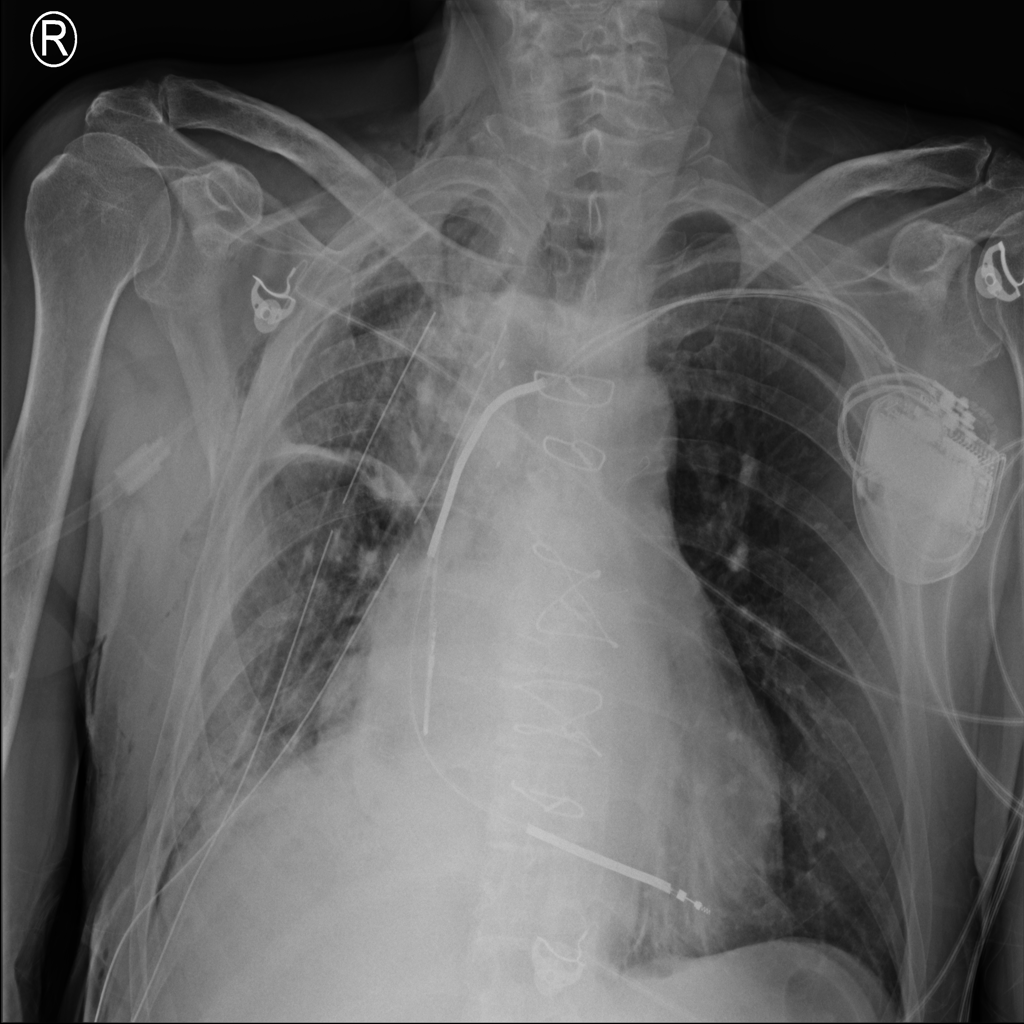

In [17]:
ds_test[10]['image']

In [22]:


model_path = "ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_19/best_model_epoch=33_val_loss=1.0432363748550415.ckpt"

NameError: name '__file__' is not defined